# Load the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

# 1. Load the dataset

In [ ]:
file_path = r"C:\Users\abdel\Downloads\CC GENERAL.csv"
data = pd.read_csv(file_path)
data['CUST_ID'] = data['CUST_ID'].str.replace('C', '')
data.fillna(data.mean(), inplace=True)
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# 2. Use hierarchical clustering to identify the inherent groupings within your data.

To determine the appropriate customer segmentation for defining a marketing strategy, we should consider the characteristics of the dataset and the business goals.

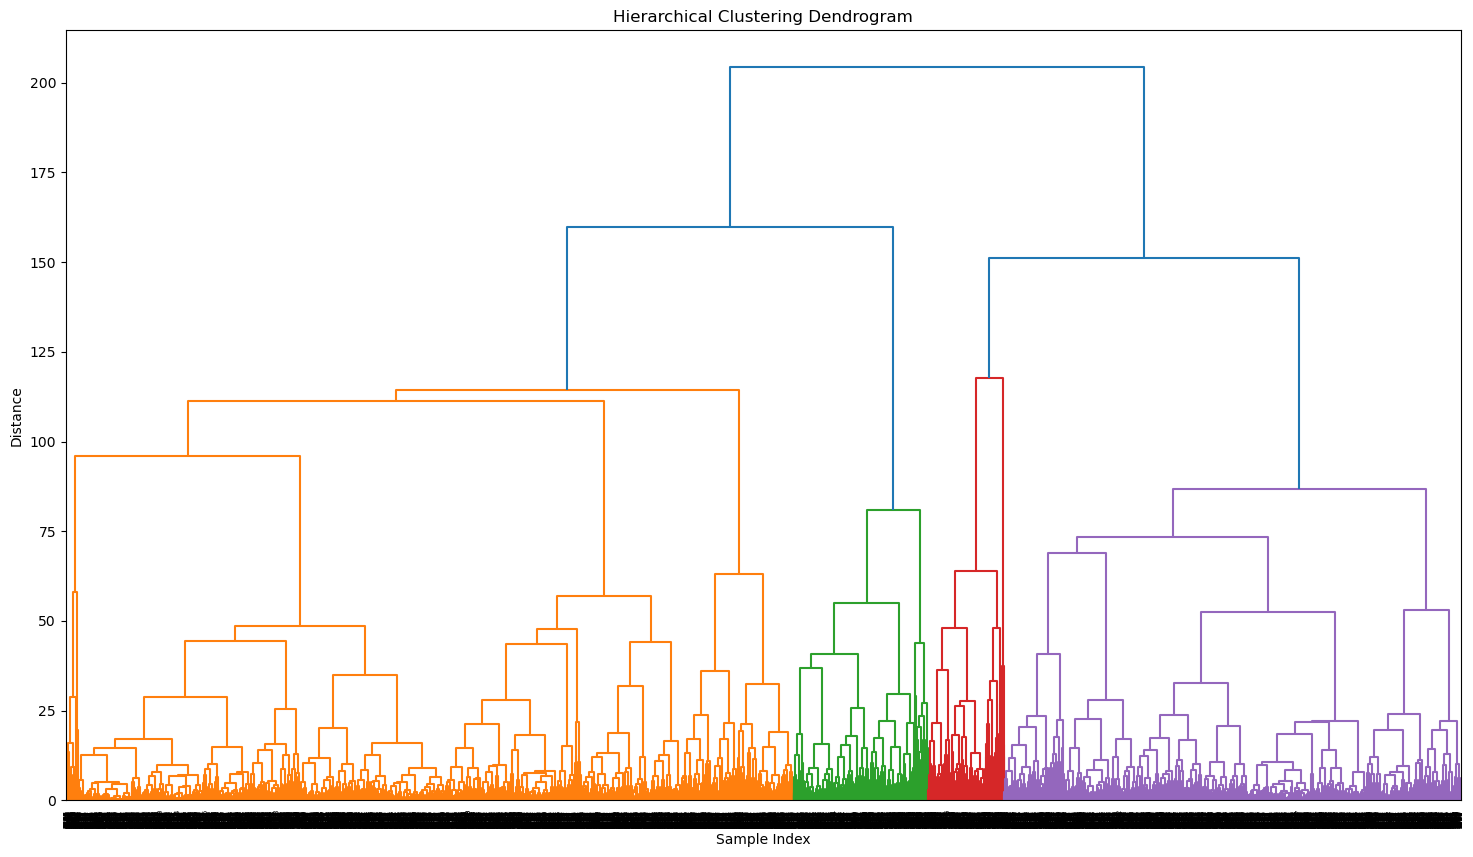

In [ ]:
features = data.drop(['CUST_ID'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(18, 10))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

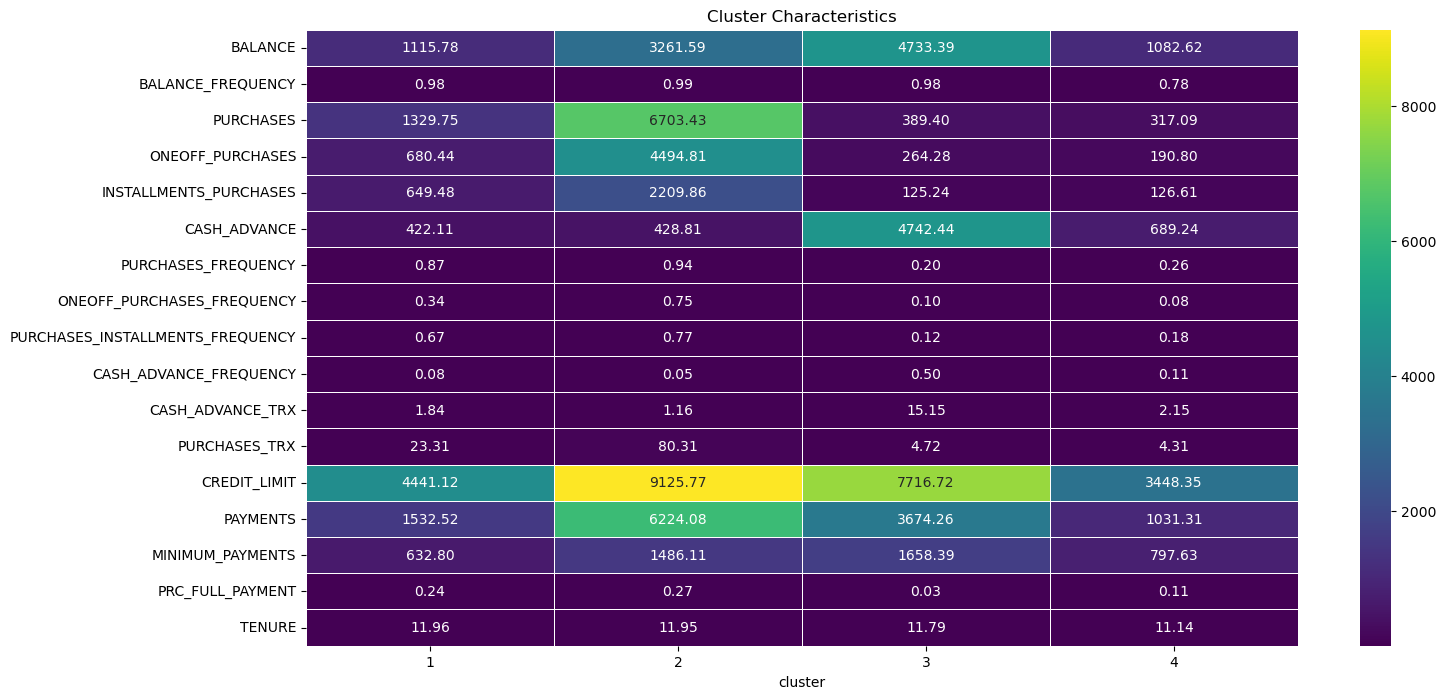

In [ ]:
data = data.apply(pd.to_numeric, errors='coerce')

threshold = 150 
cluster_labels = fcluster(linked, threshold, criterion='distance')

data['cluster'] = cluster_labels

cluster_summary = data.groupby('cluster').mean()

plt.figure(figsize=(16, 8))
sns.heatmap(cluster_summary.T, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Cluster Characteristics')
plt.show()


# Interpretation
| Cluster | Average Balance | Average Purchases | Average Cash Advance | Purchases Frequency | Cash Advance Frequency | Credit Limit | Payments | Minimum Payments | Full Payment Percentage | Tenure |
|---------|-----------------|---------------------|------------------------|----------------------|------------------------|--------------|----------|-------------------|-------------------------|--------|
| 1       | Moderate balance | Moderate purchases | Low cash advance | Moderate frequency | Low cash advance usage | Moderate credit limit | Regular payments | Low minimum payments | Low full payment percentage | Average tenure |
| 2       | High balance | High purchases | Low cash advance | High frequency | Low cash advance usage | High credit limit | High payments | Low minimum payments | Moderate full payment percentage | Average tenure |
| 3       | Very high balance | Low purchases | Very high cash advance | Low frequency | Very high cash advance usage | High credit limit | Moderate payments | High minimum payments | Very low full payment percentage | Average tenure |
| 4       | Low balance | Low purchases | Moderate cash advance | Low frequency | Low to moderate cash advance usage | Moderate credit limit | Low payments | Moderate minimum payments | Low to moderate full payment percentage | Below-average tenure |

**Potential Marketing Segments and Strategies:**

1. **Cluster 1 (Moderate Users):**
   - **Business Context:** These customers maintain a moderate balance, make moderate purchases, and use cash advances infrequently.
   - **Marketing Strategy:** Target them with promotions to increase purchase frequency. Provide incentives for full payments to improve the full payment percentage.

2. **Cluster 2 (High Spenders):**
   - **Business Context:** High-balance customers with frequent high-value purchases and low cash advance usage.
   - **Marketing Strategy:** Offer exclusive rewards, premium services, or credit limit upgrades to encourage continued high-value purchases. Focus on loyalty programs.

3. **Cluster 3 (Cash Advance Users):**
   - **Business Context:** Customers with very high balances, low purchase activity, and a tendency to use a significant amount of cash advances.
   - **Marketing Strategy:** Offer promotions to encourage more purchases and reduce reliance on cash advances. Provide financial education to help manage cash advances more effectively.

4. **Cluster 4 (Low Activity Users):**
   - **Business Context:** Customers with low balances, infrequent purchases, and moderate cash advance usage.
   - **Marketing Strategy:** Encourage more frequent purchases through targeted promotions. Offer credit limit increases for responsible users to boost activity.

# 3. Plote the clusters

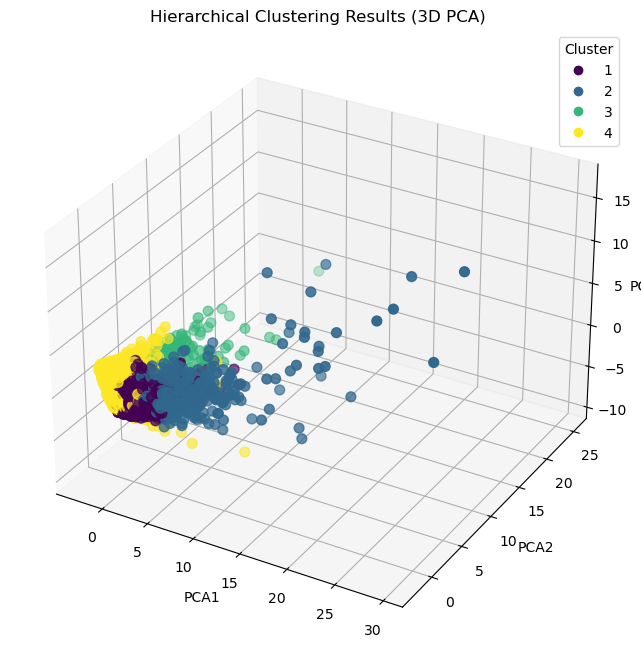

In [ ]:
# Apply PCA to reduce dimensions to 3
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)
data[['pca1', 'pca2', 'pca3']] = pca_result

plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(data['pca1'], data['pca2'], data['pca3'], c=data['cluster'], cmap='viridis', s=50)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('Hierarchical Clustering Results (3D PCA)')
ax.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

# 4. Use K-means clustering. 

In [ ]:
num_clusters = 4  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\abdel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# 5. Try different K values and select the best one. 

C:\Users\abdel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abdel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abdel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abdel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

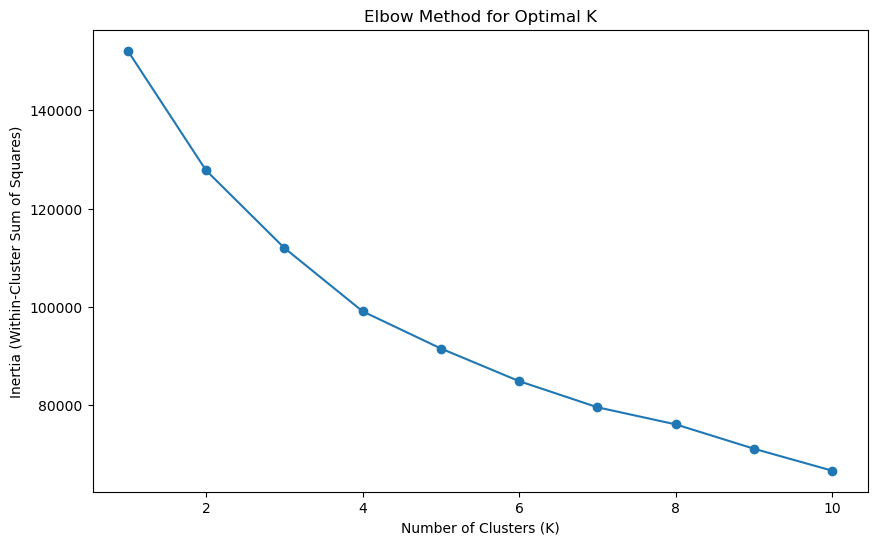

In [ ]:
inertia_values = []
k_values = range(1, 11) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

According to the elbow method, the optimal k value is 4.

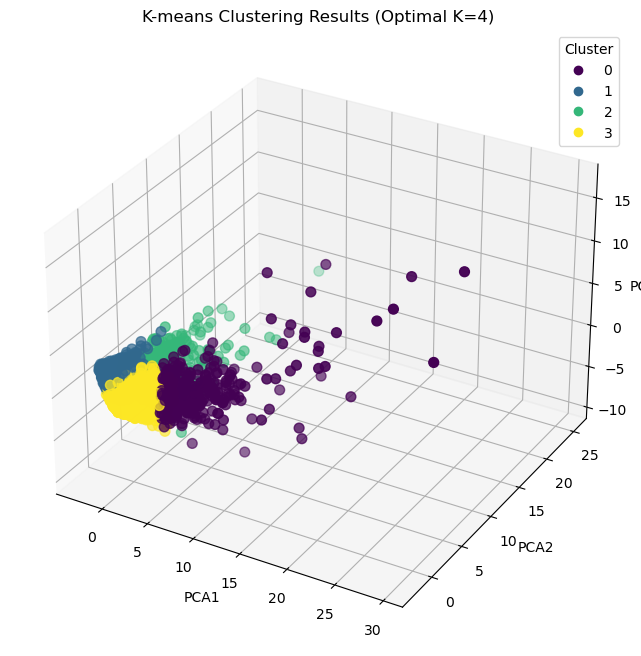

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)
data[['pca1', 'pca2', 'pca3']] = pca_result

plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(data['pca1'], data['pca2'], data['pca3'], c=data['optimal_k_cluster'], cmap='viridis', s=50)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title(f'K-means Clustering Results (Optimal K={4})')
ax.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

C:\Users\abdel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abdel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abdel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abdel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

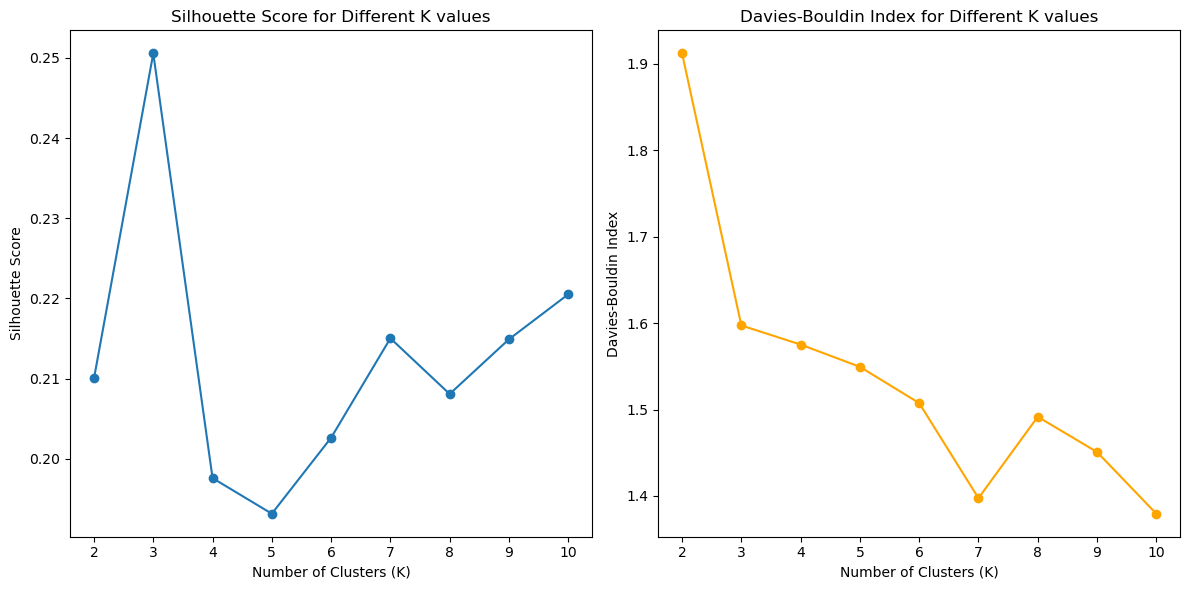

In [ ]:
k_values = range(2, 11)
silhouette_scores = []
davies_bouldin_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    
    # Silhouette Score
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

    # Davies-Bouldin Index
    davies_bouldin_avg = davies_bouldin_score(scaled_data, labels)
    davies_bouldin_scores.append(davies_bouldin_avg)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different K values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

# Plot Davies-Bouldin Index
plt.subplot(1, 2, 2)
plt.plot(k_values, davies_bouldin_scores, marker='o', color='orange')
plt.title('Davies-Bouldin Index for Different K values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

In [27]:
df = pd.read_csv(r"C:\Users\abdel\Downloads\CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Hierarchical Clustering

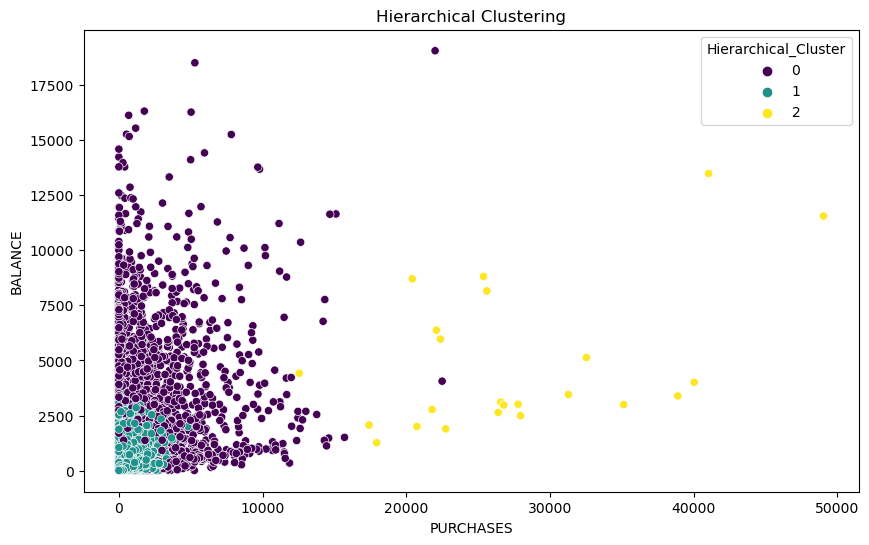

In [31]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

hierarchical_cluster = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical_cluster.fit_predict(df.drop('CUST_ID', axis=1))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PURCHASES', y='BALANCE', hue='Hierarchical_Cluster', data=df, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.show()

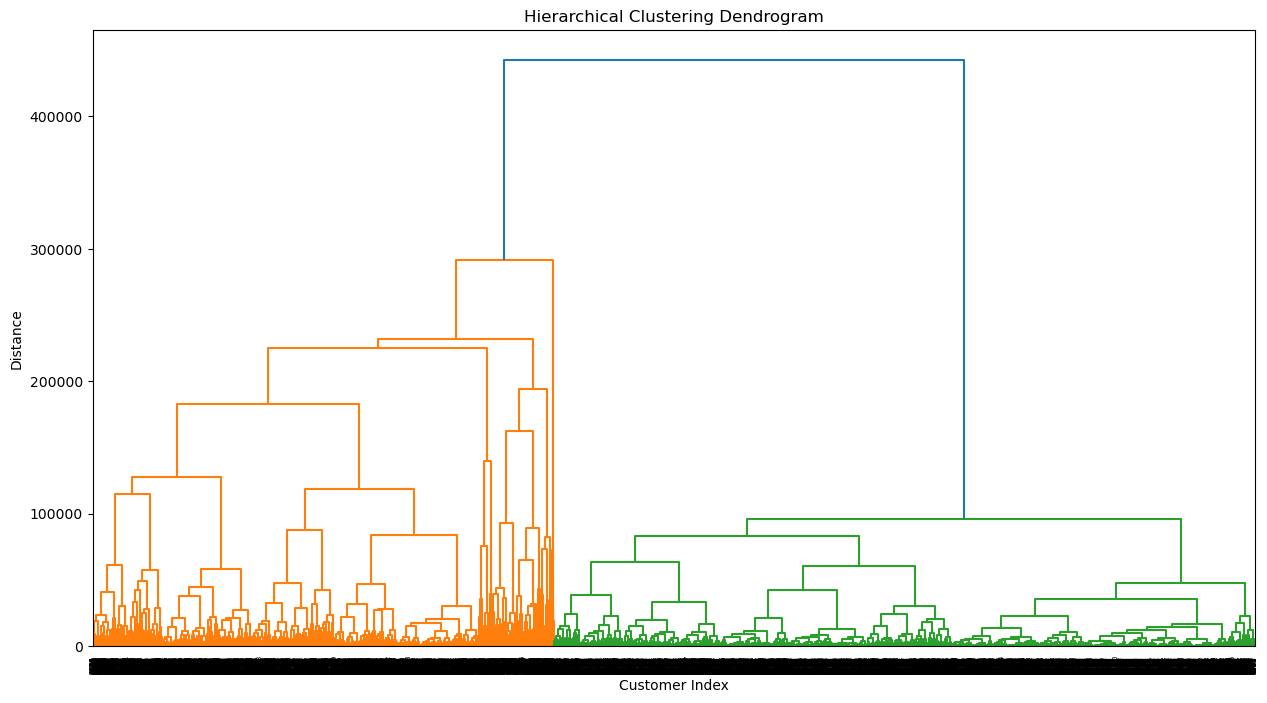

In [20]:
linked = linkage(df[numeric_columns], 'ward')

plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

# K-means clustering

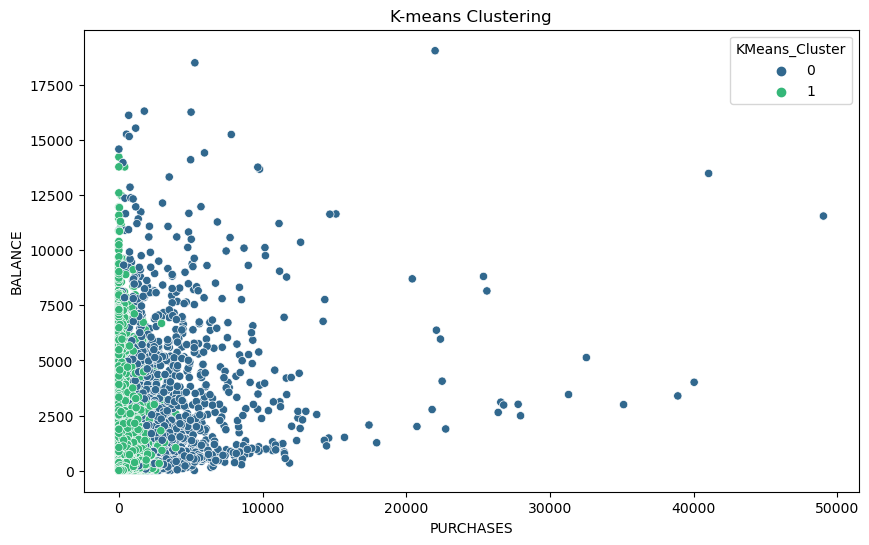

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# Apply K-means clustering
k = 2  # You can choose the number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize K-means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PURCHASES', y='BALANCE', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.show()

# 5. Try different K values and select the best one. (Silhouette Scores)

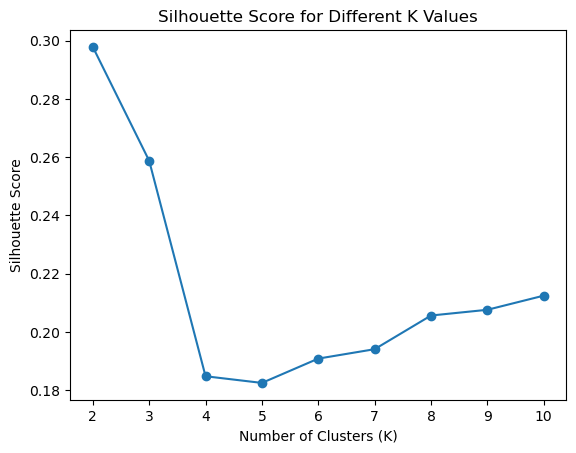

The best K value is: 2


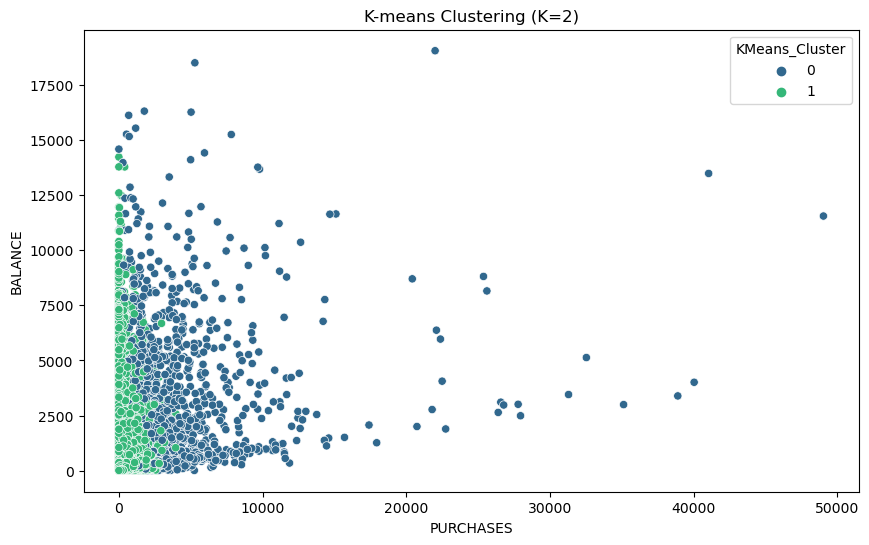

In [13]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

k_values = range(2, 11)  
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, df['KMeans_Cluster']))

plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"The best K value is: {best_k}")

best_kmeans = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['KMeans_Cluster'] = best_kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PURCHASES', y='BALANCE', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title(f'K-means Clustering (K={best_k})')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.show()


# 5. Try different K values and select the best one. (Davies-Bouldin Index)

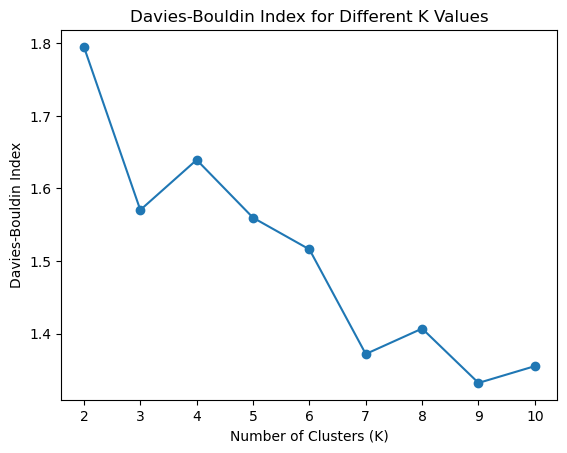

The best K value is: 9


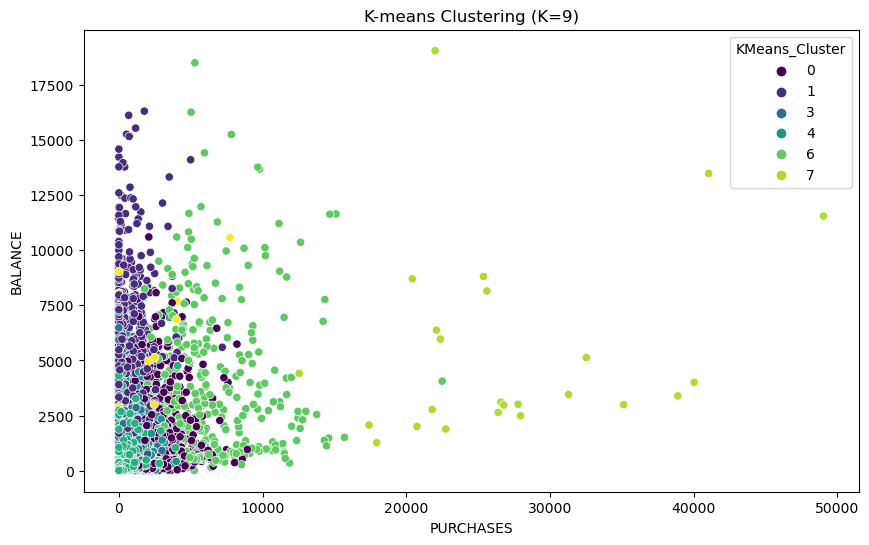

In [21]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

k_values = range(2, 11)
davies_bouldin_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)
    davies_bouldin_scores.append(davies_bouldin_score(scaled_data, df['KMeans_Cluster']))

plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.show()

best_k = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]
print(f"The best K value is: {best_k}")

best_kmeans = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['KMeans_Cluster'] = best_kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PURCHASES', y='BALANCE', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title(f'K-means Clustering (K={best_k})')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.show()